## Hexbin and Stack Plotter

In [1]:
CC = 0.1

We call the libraries and the data from the experiment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import os

if not os.path.exists("Figures"):
    os.makedirs("Figures")

In [3]:
mydata = np.genfromtxt("out_watts",delimiter="\t")

In [4]:
TotalDensity = [i[0] for i in mydata] #Total bacterial density
Suc = [i[1] for i in mydata] #Susceptible strain total density
Res = [i[2] for i in mydata] #Resistant strain total density
Rel_Freq = [i[2]/(i[1]+i[2]) for i in mydata] #Resistant Relative Frequency
Suc_win = [i[3] for i in mydata] #Number of wins of Susceptible strain
Res_win = [i[4] for i in mydata] #Number of wins of Resistant strain
R_S_winratio = [i[4]/(i[3]+i[4]) for i in mydata]#node-to-node Resistant WinRatio
Netdensity = [i[6] for i in mydata] #Network density
clustc = [i[7] for i in mydata] #Network clustering coefficient
clo_centr = [i[8] for i in mydata] #Closeness centrality
ant_deg = [i[9] for i in mydata] #Antibiotic source connectivity
bet_centr = [i[10] for i in mydata] #Betweeness centrality

In [5]:
NamesDict = {'TotDen':'Total Bacterial Density','SucDen': 'Susceptible Bacteria Density',
             'ResDen': 'Resistant Bacteria Density','Rel_Freq': 'Resistant Relative Frequency',
       'SucWin': 'Susceptible Node Winners', 'ResWin':'Resistant Node Winners', 'R_S_winratio':'Ratio of winners R/S',
       'NetDen':'Network Density','ClustC':'Global Clustering Coefficient','CloCentr':'Closeness Centrality',
        'ant_deg':'Connectivity of Antibiotic Source',
       'BetCentr':'Betweenness Centrality'}

In [6]:
d = {'TotDen':TotalDensity,'SucDen':Suc,'ResDen':Res,'Rel_Freq':Rel_Freq,
       'SucWin':Suc_win, 'ResWin':Res_win, 'R_S_winratio':R_S_winratio,
       'NetDen':Netdensity,'ClustC':clustc,'CloCentr':clo_centr,'AntDeg':ant_deg,
       'BetCentr':bet_centr}
df = pd.DataFrame(d)

We generate the function for plotting many comparisons

In [7]:
def plot_comparison(colx,coly):
    
    x = np.array(df[colx])
    y = np.array(df[coly])
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    
    hb = plt.hexbin(df[colx], df[coly], gridsize=40,bins='log', cmap='inferno')
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title("Effect of the "+NamesDict[colx]+" on the "+NamesDict[coly]+ " (NS_CC"+str(CC)+")",y=1.08)
    plt.xlabel(NamesDict[colx])
    plt.ylabel(NamesDict[coly])
    cb = plt.colorbar(hb)
    cb.set_label('log(counts)')
    
    plt.savefig("Figures/"+"SenND_"+NamesDict[colx]+"_on_"+NamesDict[coly]+"_CC"+str(CC)+".png", bbox_inches='tight')
    plt.show()

### Network Density vs Total Bacterial Density

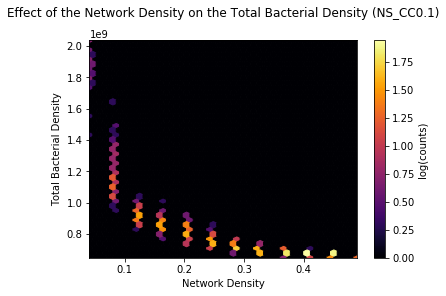

In [8]:
plot_comparison('NetDen','TotDen')

### Density vs R-Relative Frequency

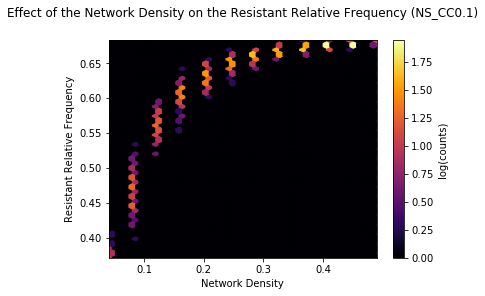

In [9]:
plot_comparison('NetDen','Rel_Freq')

### Clustering Coefficent vs R-Relative Frequency

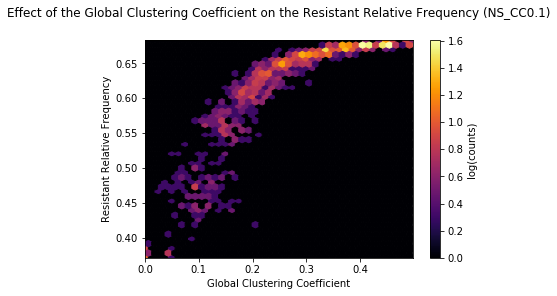

In [10]:
plot_comparison('ClustC','Rel_Freq')

### Relationship between Node Winners and S/R Ratio

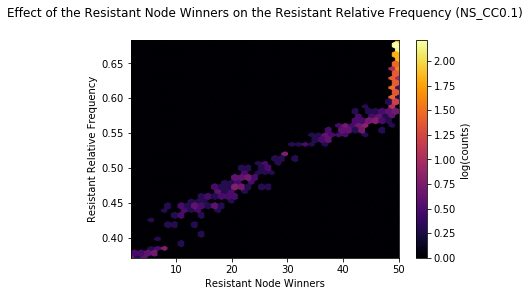

In [11]:
plot_comparison('ResWin','Rel_Freq')

### Centrality measures

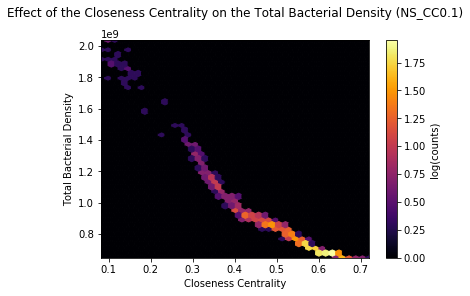

In [12]:
plot_comparison('CloCentr','TotDen')

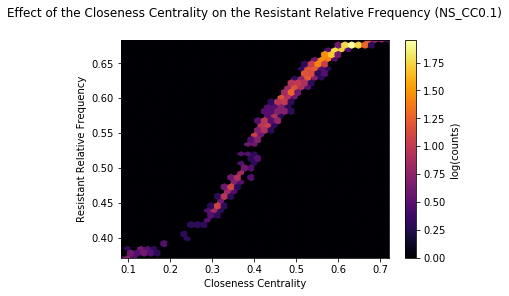

In [13]:
plot_comparison('CloCentr','Rel_Freq')

## Analysis of Relative Frequency AND Density

In [14]:
def stackplot_column(column):
    sorted_df = df.sort(column)
    plt.stackplot(sorted_df[column],sorted_df.ResDen,sorted_df.SucDen,colors=['red','blue'])
    plt.title("Effect of "+NamesDict[column]+" on the metapopulation",y=1.08)
    plt.ylabel("Bacterial Density")
    plt.xlabel(NamesDict[column])
    plt.legend(['Resistant','Susceptible'])
    plt.savefig("Figures/"+"SenND_StackPlot_"+NamesDict[column]+"_on_Populations_CC"+str(CC)+".png")
    plt.show()

### Effect of Net Density on Population 

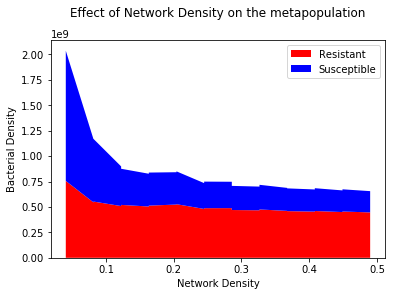

In [15]:
stackplot_column('NetDen')

### Effect of Clustering Coefficient on Populations

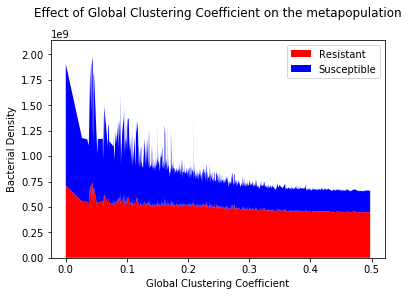

In [16]:
stackplot_column('ClustC')

### Effect of Closeness Centrality on populations

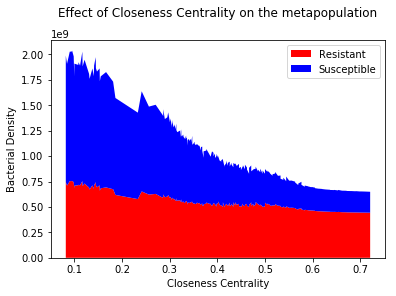

In [17]:
stackplot_column('CloCentr')

### Effect of Closeness Centrality on populations

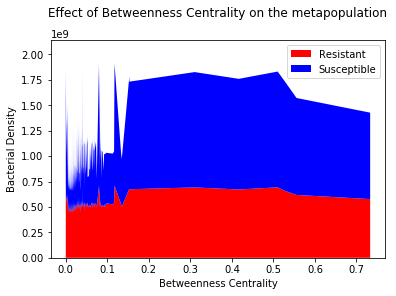

In [18]:
stackplot_column('BetCentr')

### Effect of Network Density on Populations

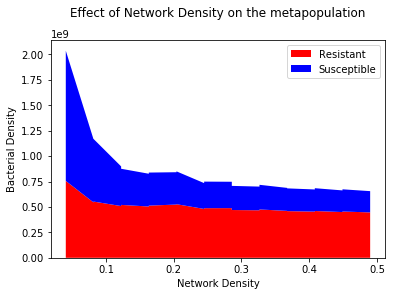

In [19]:
stackplot_column('NetDen')